In [1]:
import pandas as pd
import numpy as np

In [3]:
data=pd.read_csv('/content/diabetes.csv')

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [113]:
print(data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Outcome', ylabel='BMI'>

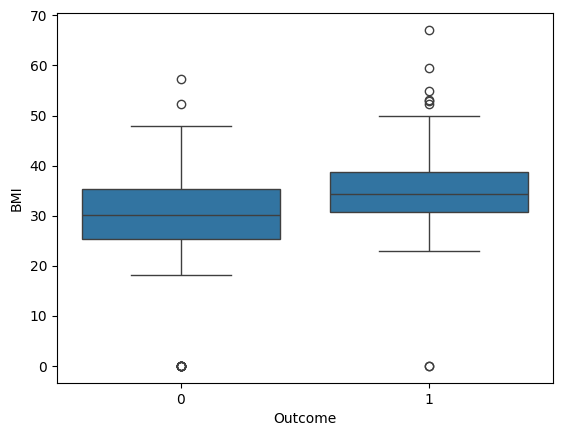

In [5]:
sns.boxplot(x='Outcome',y='BMI',data=data)

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


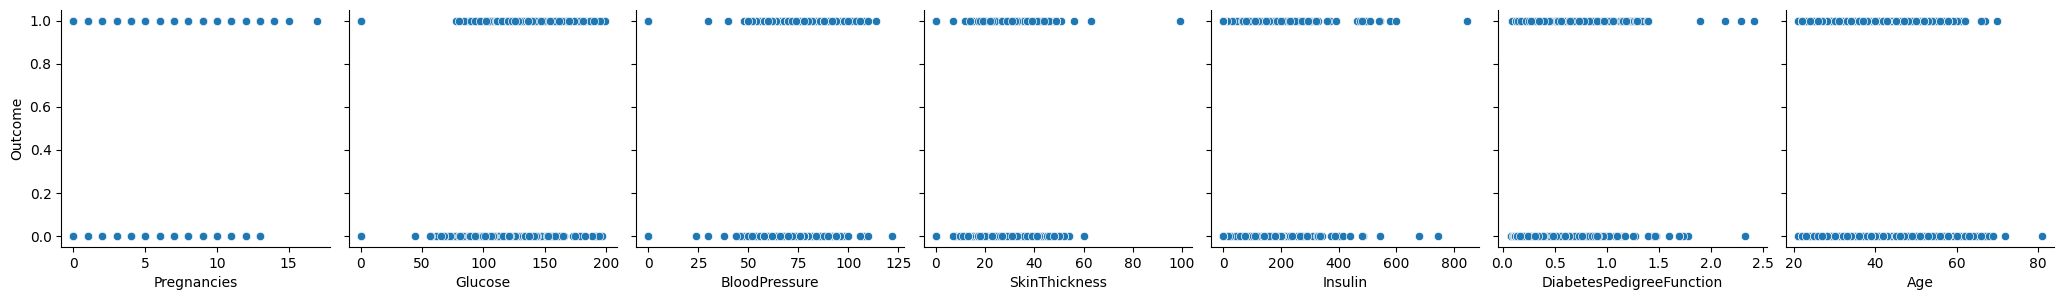

In [6]:
sns.pairplot(data,x_vars=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','DiabetesPedigreeFunction','Age'],y_vars='Outcome',size=3)

In [39]:
correlation_matrix = data.corr()


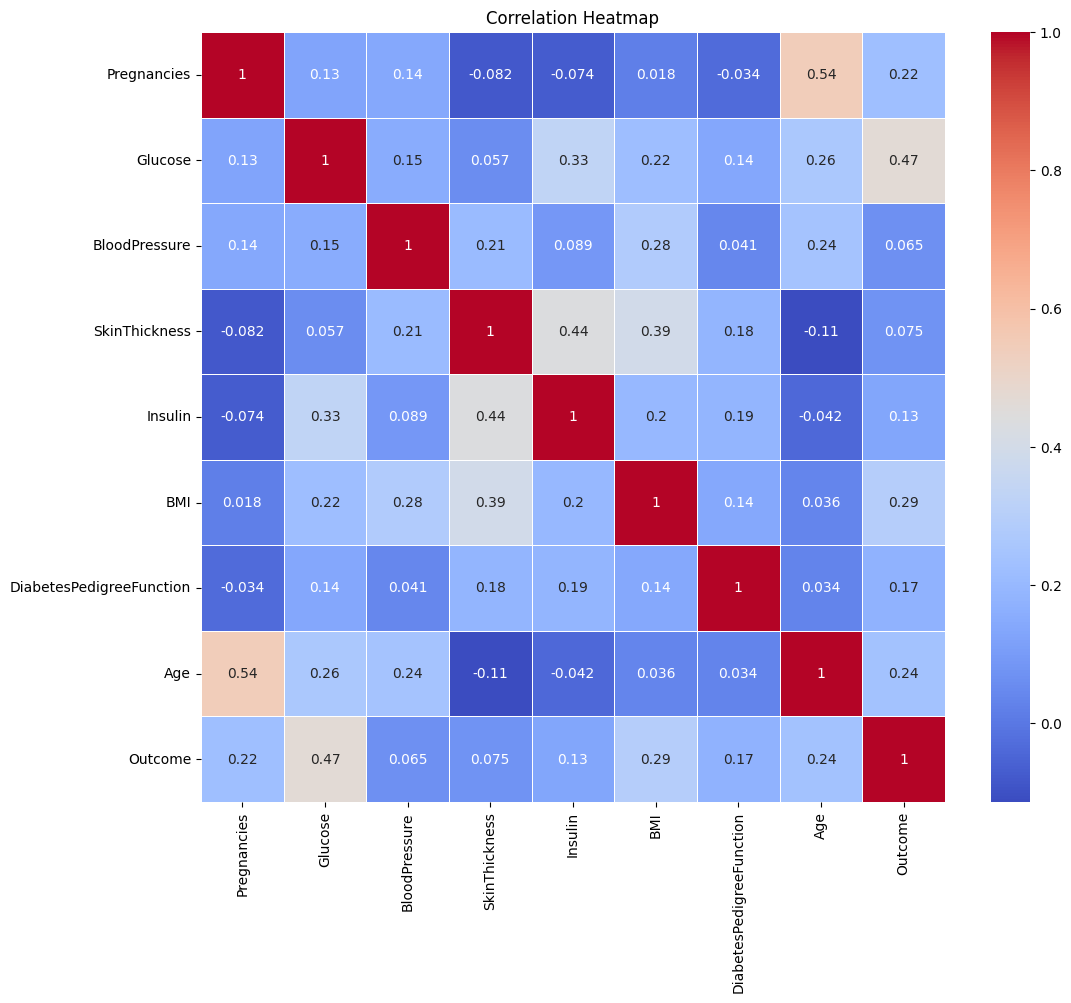

In [40]:
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [116]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [117]:

x=data.drop(['Outcome'],axis=1)#dependent variable
y=data['Outcome']#independent variable

In [114]:
x.head()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,33.6,0.627,50
1,1,85,66,26.6,0.351,31
2,8,183,64,23.3,0.672,32
3,1,89,66,28.1,0.167,21
4,0,137,40,43.1,2.288,33


In [115]:
y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


In [119]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

DECISION TREE

In [120]:
from sklearn.tree import DecisionTreeClassifier
tree_classifier=DecisionTreeClassifier(random_state=42)

In [121]:
tree_classifier.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [122]:
tree_predictions=tree_classifier.predict(x_test)

In [102]:
print(tree_predictions)

[0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0
 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0
 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 1 0
 0 1 0 0 0 0]


In [123]:
from sklearn.metrics import accuracy_score , confusion_matrix
cm=confusion_matrix(tree_predictions,y_test)
ac=accuracy_score(tree_predictions,y_test)

In [124]:
print(cm)

[[75 15]
 [24 40]]


In [125]:
print(ac)

0.7467532467532467


In [132]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=5, random_state=42)

In [133]:
rf_classifier.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=200,
                       random_state=42)

In [134]:
rf_predictions=rf_classifier.predict(x_test)

In [135]:
cm=confusion_matrix(rf_predictions,y_test)
ac=accuracy_score(rf_predictions,y_test)

In [139]:
print(cm)

[[78 18]
 [21 37]]


In [140]:
print(ac)

0.7467532467532467


In [142]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(rf_classifier,x_train,y_train,cv=5,scoring='accuracy')

In [143]:
print(ac)

0.7467532467532467


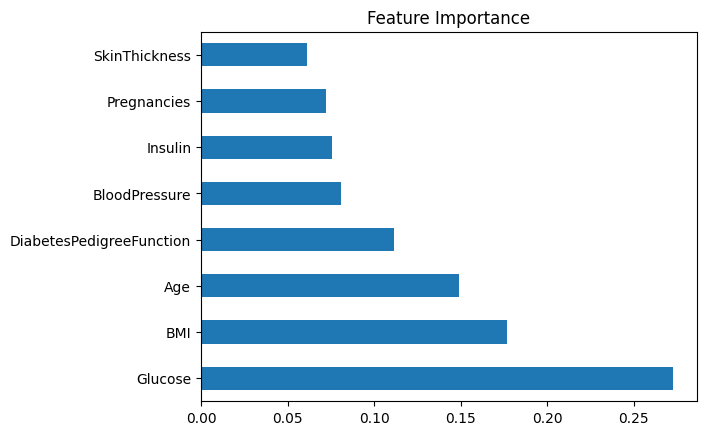

In [145]:
feature_importances = pd.Series(rf_classifier.feature_importances_, index=x.columns)
feature_importances.sort_values(ascending=False).plot(kind='barh')
plt.title('Feature Importance')
plt.show()

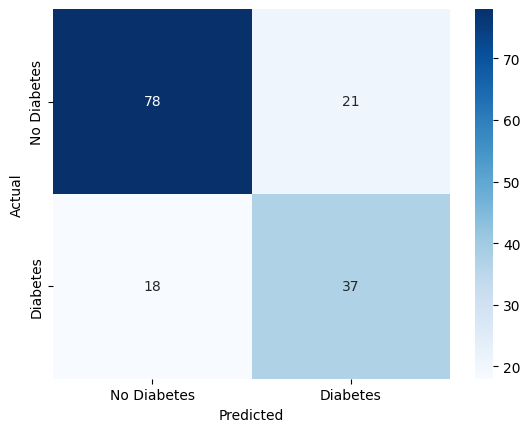

In [147]:
conf_matrix = confusion_matrix(y_test,rf_predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()